In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./survey_results_public_2017.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Question 1: Which Programming Languages Have Higher Job Satisfaction?

We drop the rows that have no value for the asked question.

In [108]:
df = df.dropna(subset=['JobSatisfaction','HaveWorkedLanguage','HaveWorkedFramework'], how='any')
df.shape

(17355, 154)

In [109]:
# This function seperates values based on delimiter/separator into their own rows and calculate their count and the mean of
# a wanted value

def separateAndCalculateMean(df,column,meanOf,separator):
    df[column] = df[column].str.replace(separator + " ", separator).str.split(separator)
    df2 = pd.DataFrame(df[column]
                   .tolist(),
                   index = [df[meanOf]])\
    .stack()\
    .reset_index(name=column)

    df2 = df2.groupby(column)[meanOf].agg(['count','mean']).reset_index().sort_values('mean',ascending=False)
    return df2

In [110]:
df2 = separateAndCalculateMean(df,'HaveWorkedLanguage','JobSatisfaction',';')
df2

,HaveWorkedLanguage,count,mean
20,Objective-C,1323,7.288738
31,TypeScript,2901,7.221992
28,Scala,843,7.217082
8,Elixir,252,7.206349
5,CoffeeScript,859,7.202561
25,Ruby,1796,7.187639
30,Swift,1260,7.161905
4,Clojure,254,7.125984
11,Go,939,7.125666
12,Groovy,690,7.078261


Let's visualize our results:

Text(0.5, 0, 'Job Satisfaction')

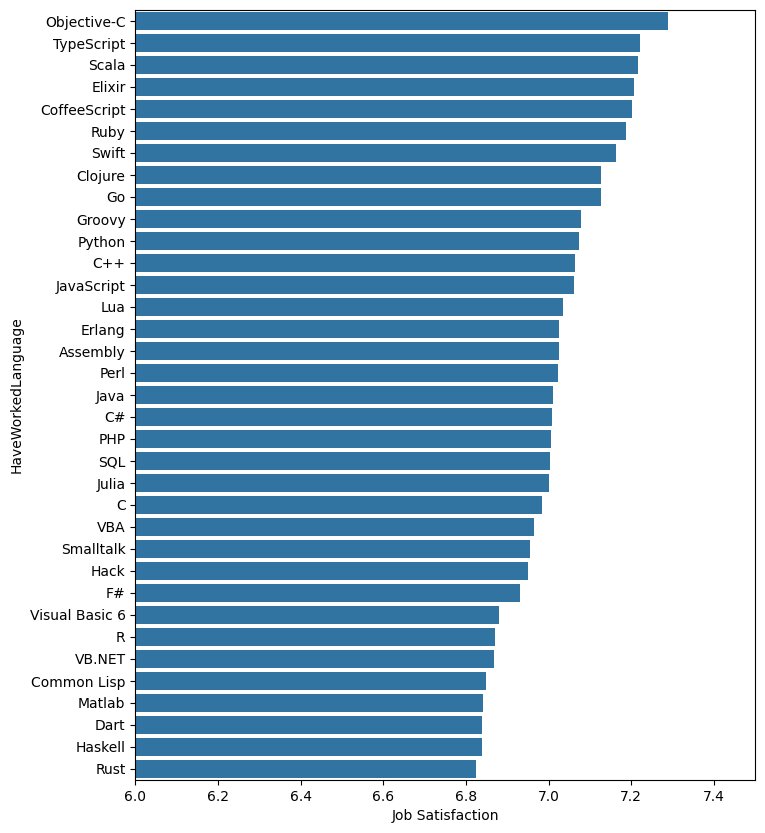

In [111]:
plt.figure(figsize=(8,10))
sns.barplot(data=df2, x='mean', y='HaveWorkedLanguage', color=sns.color_palette()[0])
plt.xlim((6,7.5));
plt.xlabel('Job Satisfaction')

We can see that the languages that have higher job satisfaction lean more to the niche side. 

## Question 2: What are the top 5 used frameworks by Companies by size?

We will split by delimiter and change the type of the company size data from strings to categorical, it will make it easier to sort and deal with:

In [112]:
df['HaveWorkedFramework'] = df['HaveWorkedFramework'].str.replace(' ', '').str.split(';')
CompanySize_Strings = ['Fewer than 10 employees', '10 to 19 employees', '20 to 99 employees', '100 to 499 employees', '500 to 999 employees','1,000 to 4,999 employees',
                 '5,000 to 9,999 employees','10,000 or more employees']

CompanySize_Type = pd.api.types.CategoricalDtype(ordered=True, categories=CompanySize_Strings)
df['CompanySize'] = df['CompanySize'].astype(CompanySize_Type);

In [113]:
df.groupby(df['CompanySize'])[['CompanySize','JobSatisfaction']].mean(numeric_only=True)

,JobSatisfaction
CompanySize,
Fewer than 10 employees,7.088348
10 to 19 employees,7.059502
20 to 99 employees,7.058970
100 to 499 employees,7.071000
500 to 999 employees,6.963928
"1,000 to 4,999 employees",6.882759
"5,000 to 9,999 employees",6.701209
"10,000 or more employees",6.908301


In [114]:
df2 = df.copy()
df2 = df2.explode('HaveWorkedFramework').groupby(['CompanySize','HaveWorkedFramework'])[['Respondent']].count()
df2 = df2.sort_values(['CompanySize','Respondent'], ascending = [True, False]).groupby('CompanySize').head(5)
df2

Respondent
CompanySize              HaveWorkedFramework            
Fewer than 10 employees  Node.js                     827
                         AngularJS                   717
                         .NETCore                    447
                         React                       356
                         Cordova                     252
10 to 19 employees       Node.js                     798
                         AngularJS                   751
                         .NETCore                    479
                         React                       355
                         Cordova                     253
20 to 99 employees       AngularJS                  1729
                         Node.js                    1685
                         .NETCore                   1160
                         React                       735
                         Cordova                     411
100 to 499 employees     AngularJS                  1415
                         Node.js                    1360
                         .NETCore                   1083
                         React                       654
                         Cordova                     296
500 to 999 employees     AngularJS                   464
                         Node.js                     411
                         .NETCore                    352
                         React                       203
                         Cordova                      87
1,000 to 4,999 employees AngularJS                   640
                         Node.js                     625
                         .NETCore                    554
                         React                       274
                         Hadoop                      113
5,000 to 9,999 employees AngularJS                   270
                         Node.js                     246
                         .NETCore                    220
                         React                        81
                         Hadoop                       55
10,000 or more employees Node.js                     933
                         AngularJS                   917
                         .NETCore                    738
                         React                       341
                         Hadoop                      233

Let's do a visualization for our result:

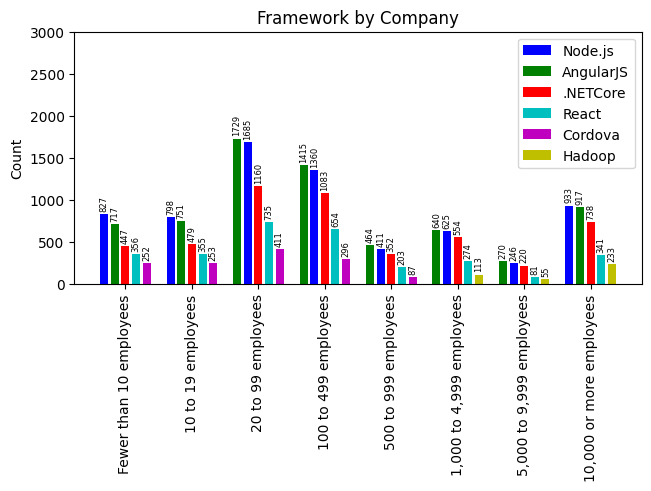

In [115]:
df2 = df2.reset_index(['CompanySize','HaveWorkedFramework'])


framework_respondents = {}


for i in range(len(df2['CompanySize'])):
    if df2['CompanySize'][i] not in framework_respondents.keys():
        framework_respondents[df2['CompanySize'][i]] = [[],[],[]]
        framework_respondents[df2['CompanySize'][i]][0].append(df2['Respondent'][i])
        framework_respondents[df2['CompanySize'][i]][1].append(df2['HaveWorkedFramework'][i])
        framework_respondents[df2['CompanySize'][i]][2].append(i)
    else:
        framework_respondents[df2['CompanySize'][i]][0].append(df2['Respondent'][i])
        framework_respondents[df2['CompanySize'][i]][1].append(df2['HaveWorkedFramework'][i])


legends_color = {
    'Node.js': 'b',
    'AngularJS': 'g',
    '.NETCore': 'r',
    'React':'c',
    'Cordova': 'm',
    'Hadoop':'y'
}


def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique))



x = np.arange(len(CompanySize_Strings))  # the label locations
width = 0.6  # the width of the bars

fig, ax = plt.subplots(constrained_layout=True)

for attribute, measurement in framework_respondents.items():
    k = -1.6
    #offset = width * multiplier
    for i in range(0,len(measurement[0])):
        rects = ax.bar(np.array(measurement[2]) + k  , measurement[0][i], width, label=measurement[1][i], color= legends_color[measurement[1][i]] )
        ax.bar_label(rects, padding=2, fontsize=6,rotation = 90) 
        k+=0.8

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Framework by Company')
ax.set_xticks([0,5,10,15,20,25,30,35], CompanySize_Strings,rotation = 90)
ax.legend(loc='upper right', ncol=6)
ax.set_ylim(0, 3000)
legend_without_duplicate_labels(ax)

plt.show()

## Question 3: Which performance metric is well liked by developers?

We can drop the rows with no data for metrics, then we will use our previously made function to calcualte the count and the mean of the variable we are interested in:

In [116]:
df = df.dropna(subset=['MetricAssess'], how='any')

In [117]:
df2 = separateAndCalculateMean(df,'MetricAssess','JobSatisfaction',';')
df2

,MetricAssess,count,mean
6,Manager's rating,4248,7.276601
9,Peers' rating,6712,7.182360
12,Self-rating,4169,7.149436
7,On time/in budget,7845,7.124665
11,Revenue performance,3428,7.097141
3,Customer satisfaction,8335,7.079424
0,Benchmarked product performance,4797,7.041276
4,Hours worked,1590,6.962893
10,Release frequency,1467,6.958419
8,Other,391,6.953964
